In [61]:
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
benchmark = "mmlu_pro"
model = "Llama-3.3-70B-Instruct-Turbo-Free"
conf = {"verbal_numerical_shared_sampling": "Verbal Numerical", 
        "verbal_linguistic_shared_sampling": " Verbal Linguistic", 
        "logit_perplexity_shared_sampling": "Logit Perplexity", 
        "token_sar_shared_sampling": "Token SAR"}

def get_confidence(benchmark, model, conf):
    file_path = f"../results/{benchmark}_{model}_{conf}_30.html"
    with open(file_path, "r", encoding="utf-8") as file:
        html_content = file.read()
    soup = BeautifulSoup(html_content, "html.parser")
    pattern = re.compile(r"Extracted Answer Confidence:\s([0-9]*\.?[0-9]+)", re.IGNORECASE)
    matches = pattern.findall(soup.get_text())
    return np.array(matches, dtype=float)

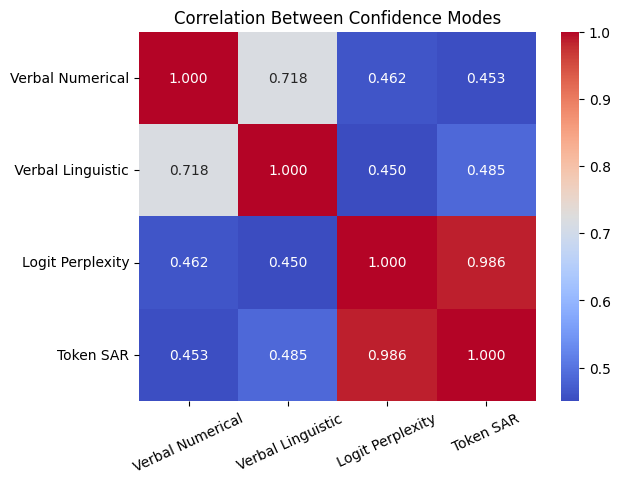

In [63]:
df = pd.DataFrame({v : get_confidence(benchmark, model, k) for k, v in conf.items()})
corr = df.corr(method='spearman')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".3f")
plt.title("Correlation Between Confidence Modes")
plt.xticks(rotation=25)
plt.show()